# EDA

## 사전작업
앞서 정리한 데이터와 사용할 라이브러리를 불러오고, 추가적으로 필요한 처리를 진행합니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", palette="deep")

retail = pd.read_csv('OnlineRetailClean.csv')
retail.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,CheckoutPrice
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [2]:
# unnamed column을 제거
retail = retail.drop('Unnamed: 0', axis=1)
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,CheckoutPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762398 entries, 0 to 762397
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Invoice        762398 non-null  int64  
 1   StockCode      762398 non-null  object 
 2   Description    762398 non-null  object 
 3   Quantity       762398 non-null  int64  
 4   InvoiceDate    762398 non-null  object 
 5   Price          762398 non-null  float64
 6   Customer ID    762398 non-null  float64
 7   Country        762398 non-null  object 
 8   CheckoutPrice  762398 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 52.3+ MB


InvoiceDate 데이터타입이 object로 바뀌어서 datetime으로 다시 바꿔줍니다.

In [4]:
# 데이터 타입 변경
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762398 entries, 0 to 762397
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Invoice        762398 non-null  int64         
 1   StockCode      762398 non-null  object        
 2   Description    762398 non-null  object        
 3   Quantity       762398 non-null  int64         
 4   InvoiceDate    762398 non-null  datetime64[ns]
 5   Price          762398 non-null  float64       
 6   Customer ID    762398 non-null  float64       
 7   Country        762398 non-null  object        
 8   CheckoutPrice  762398 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 52.3+ MB


In [5]:
retail.describe()

,Invoice,Quantity,Price,Customer ID,CheckoutPrice
count,762398.000000,762398.000000,762398.000000,762398.000000,762398.000000
mean,536459.344015,13.414482,3.229274,15320.593172,22.111280
std,26400.918192,114.499453,29.944246,1695.032715,124.590518
min,489434.000000,1.000000,0.001000,12346.000000,0.001000
25%,513964.000000,2.000000,1.250000,13971.000000,4.950000
50%,535789.000000,6.000000,1.950000,15249.000000,12.500000
75%,560412.750000,12.000000,3.750000,16791.000000,19.800000
max,579885.000000,74215.000000,10953.500000,18287.000000,77183.600000


## 데이터 특징 확인 및 시각화

### 가장 많이 팔린 상품 10개

In [6]:
# 가장 많이 팔린 상품 10개의 상품명을 알아보자
retail.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     103822
WHITE HANGING HEART T-LIGHT HOLDER     91012
MEDIUM CERAMIC TOP STORAGE JAR         77729
ASSORTED COLOUR BIRD ORNAMENT          76960
JUMBO BAG RED RETROSPOT                73169
BROCADE RING PURSE                     69791
PACK OF 60 PINK PAISLEY CAKE CASES     54376
60 TEATIME FAIRY CAKE CASES            52704
PACK OF 72 RETRO SPOT CAKE CASES       45129
PACK OF 72 RETROSPOT CAKE CASES        44437
Name: Quantity, dtype: int64

### 월별 판매량 추이

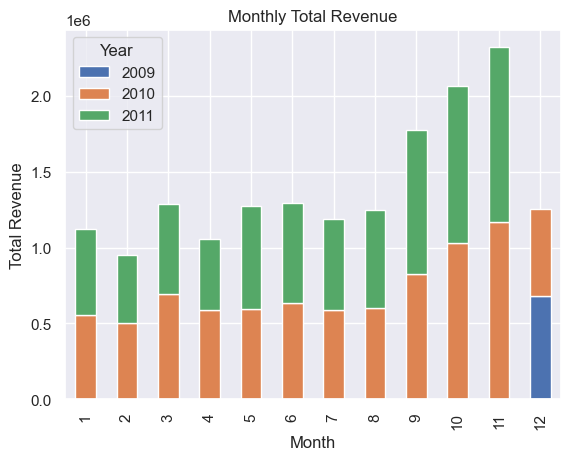

In [7]:
# InvoiceDate의 년도와 월을 추출하여 각각의 열을 생성
retail['year'] = retail['InvoiceDate'].dt.year
retail['month'] = retail['InvoiceDate'].dt.month

# 월별 매출을 막대그래프로 시각화
monthly_revenue = retail.groupby(['month', 'year'])['CheckoutPrice'].sum().unstack()
monthly_revenue.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Total Revenue')
plt.legend(title='Year')
plt.show()

9월부터 매출이 급상승하여 11월에 피크를 찍고 12월에 하락하는 추세를 보입니다.

2년간 데이터에서 첫해와 둘째해의 경과도 비슷한 추세를 보이는 것으로 보아 주기성이 있을 것으로 고려할 수 있습니다.

### 국가별 매출 비율

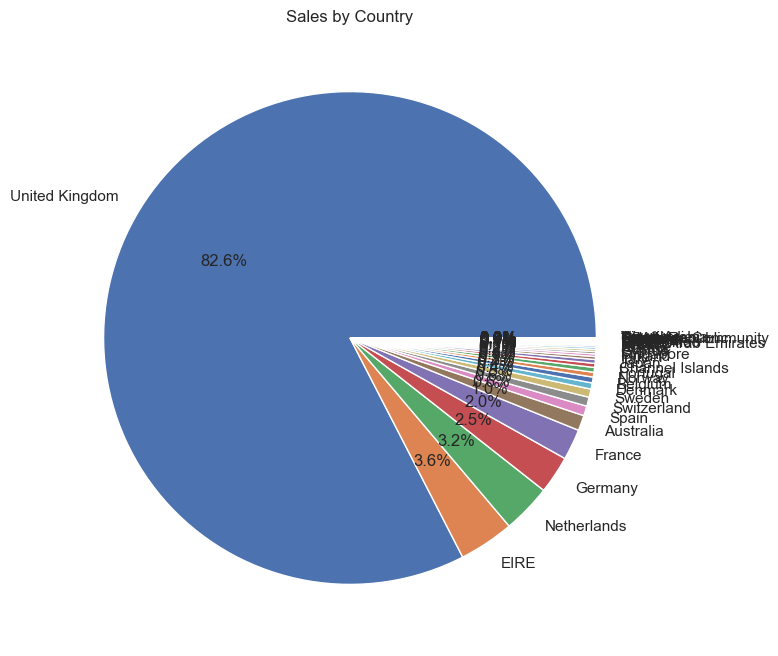

In [17]:
# 국가별 매출을 파이차트로 시각화
sales_by_country = retail.groupby('Country')['CheckoutPrice'].sum().sort_values(ascending=False)
colors = sns.color_palette('deep', len(sales_by_country))
sales_by_country.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', colors=colors)
plt.ylabel('')
plt.title('Sales by Country')
plt.show()

영국 소재 기업이기 때문에 영국 국적의 고객이 역시 가장 많은 것으로 관찰됩니다.

### 요일별 매출

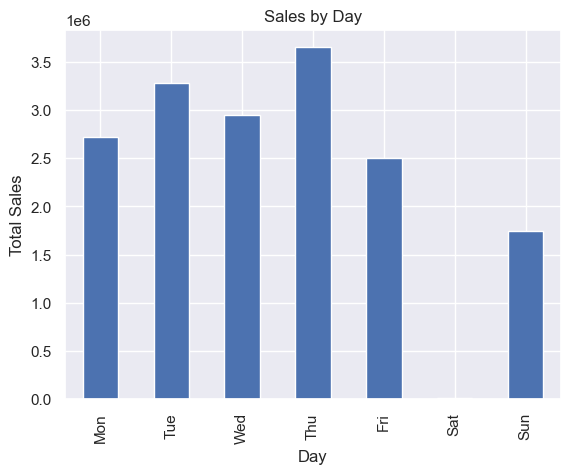

In [9]:
# InvoiceDate열에서 요일을 추출하여 새로운 열을 생성
retail['Day'] = retail['InvoiceDate'].dt.weekday

# 요일별 매출을 막대그래프로 시각화
sales_by_day = retail.groupby('Day')['CheckoutPrice'].sum()
sales_by_day.plot(kind='bar')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.title('Sales by Day')
plt.show()


토요일 매출이 없는 것으로 보아 토요일은 휴무이거나 판매 처리를 하지 않는 것으로 추측됩니다.

### 시간대별 매출

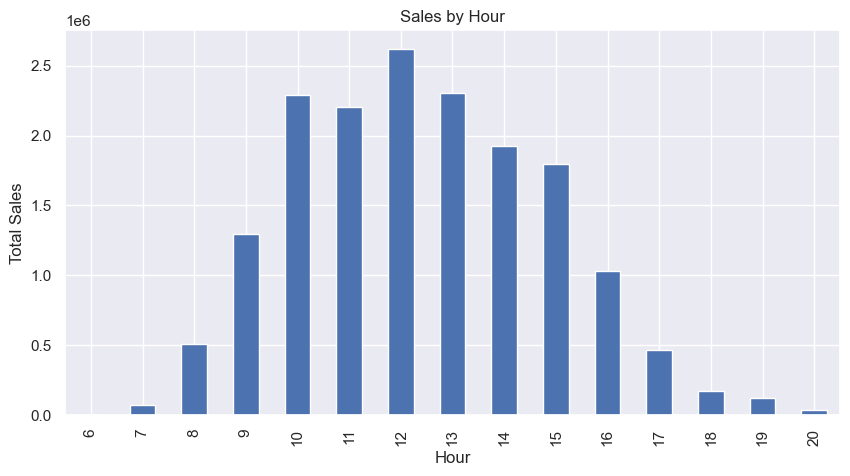

In [10]:
# InvoiceDate열에서 시간을 추출하여 새로운 열을 생성
retail['hour'] = retail['InvoiceDate'].dt.hour

# 시간별 매출을 막대그래프로 시각화
sales_by_hour = retail.groupby('hour')['CheckoutPrice'].sum()
sales_by_hour.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.title('Sales by Hour')
plt.show()

오전부터 낮까지 매출이 상승하다 정오에 피크를 찍고 오후에 하락하는 추세를 보입니다.

다만 오후 시간대는 전반적으로 높은 매출을 보이고 있으며, 새벽과 심야에는 매출이 없는 것으로 볼때, 통상적인 영업시간 내에서만 매출이 발생하는 것으로 추정할 수 있습니다.

이 경우, 다음과 같이 두 가지로 나누어 볼 수 있습니다.

1) 영업시간이 정해져 있어, 영업시간 내에서만 판매로 처리되는 경우
2) 영업시간이 정해져 있지 않으나, 고객들이 특정 시간대에만 주문을 하는 경우

2번의 경우는 2년간 데이터에서 전체 고객들이 단 한 건의 주문도 새벽 및 심야시간대에 주문을 한 적이 없기 때문에, 1번의 경우로 추정됩니다.

### 누적 매출 기여도

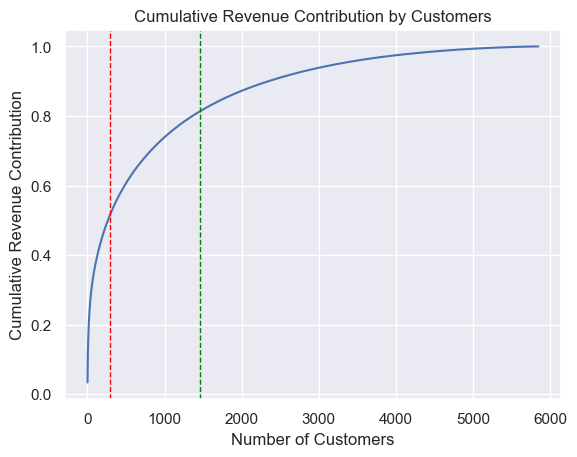

In [11]:
# 고객별 매출을 집계하고 높은 순으로 정렬
customer_revenue = retail.groupby('Customer ID')['CheckoutPrice'].sum()
customer_revenue_sorted = customer_revenue.sort_values(ascending=False)

# 누적 매출 기여도 계산 및 시각화
cumulative_revenue = customer_revenue_sorted.cumsum() / customer_revenue_sorted.sum()
plt.plot(range(1, len(cumulative_revenue) + 1), cumulative_revenue)
plt.xlabel('Number of Customers')
plt.ylabel('Cumulative Revenue Contribution')
plt.title('Cumulative Revenue Contribution by Customers')

# 고객의 5% 지점과 25% 지점을 세로선으로 표시
num_customers = len(cumulative_revenue)
five_percent = int(num_customers * 0.05)
plt.axvline(x=five_percent, color='red', linestyle='--', linewidth= 1)
twentyfive_percent = int(num_customers * 0.25)
plt.axvline(x=twentyfive_percent, color='green', linestyle='--', linewidth= 1)

plt.show()

상위 5%의 고객이 약 50%의 매출을 차지하고 있음을 알 수 있습니다.

하위 75%의 고객은 전체 매출의 20%도 차지하지 못하고 있음을 알 수 있습니다.

이는 고객들의 매출이 편향되어 있다는 것을 의미합니다.

### 구매 횟수와 고객별 매출의 상관관계

In [12]:
# 고객별 구매횟수(Invoice의 개수)와 고객별 매출(CheckoutPrice의 합계)을 집계
purchase_count = retail.groupby('Customer ID')['Invoice'].nunique()
total_revenue = retail.groupby('Customer ID')['CheckoutPrice'].sum()
customer_data = pd.DataFrame({'Purchase Count': purchase_count, 'Total Revenue': total_revenue})

# 두 변수의 상관계수를 계산
correlation = customer_data['Purchase Count'].corr(customer_data['Total Revenue'])
correlation

0.6353988905365039

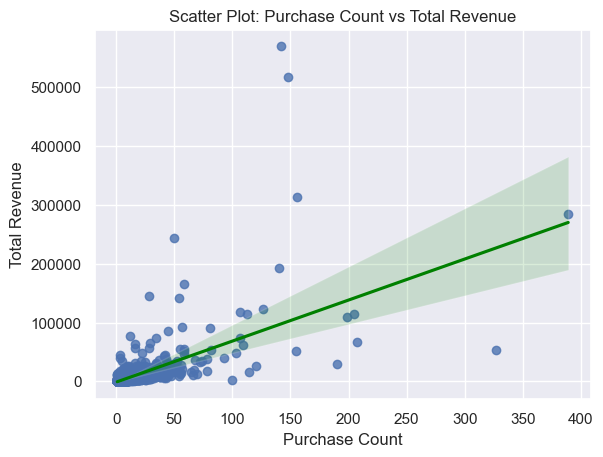

In [18]:
# 두 변수의 산점도와 회귀선을 시각화
sns.regplot(x=customer_data['Purchase Count'], y=customer_data['Total Revenue'], line_kws={'color': 'green'})
plt.xlabel('Purchase Count')
plt.ylabel('Total Revenue')
plt.title('Scatter Plot: Purchase Count vs Total Revenue')
plt.show()

구매 횟수와 매출의 상관관계는 약 0.64로 양의 상관관계를 가지고 있습니다.